This notebook imports NBA player data and tries to make correlations between rookie physical attributes and on-court performance

import packages and data

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

df_agility = pd.read_csv('playeragility00_17.csv')
df_adv = pd.read_csv('playeradvstats00_17.csv')
df_combine = pd.read_csv('playercombine10_17.csv')

Drop irrelevant features from data and merge separate dataframes into one master dataframe (df_merged)

In [164]:
df_agility.drop(["TEMP_PLAYER_ID"], axis=1, inplace=True)
df_agility.drop(["MODIFIED_LANE_AGILITY_TIME"], axis=1, inplace=True)
df_agility.drop(["POSITION"], axis=1, inplace=True)

In [165]:
df_merged = df_adv.merge(df_agility, on='PLAYER_NAME')
df_merged.drop(["PLAYER_ID_y"], axis=1, inplace=True)
df_merged.drop(["W"], axis=1, inplace=True)
df_merged.drop(["L"], axis=1, inplace=True)
df_merged.drop(["W_PCT"], axis=1, inplace=True)
df_merged.drop(["TEAM_ID"], axis=1, inplace=True)
df_merged.drop(["TEAM_ABBREVIATION"], axis=1, inplace=True)
df_merged.drop(["CFPARAMS"], axis=1, inplace=True)
df_merged.drop(["CFID"], axis=1, inplace=True)
df_merged.drop(["FGM"], axis=1, inplace=True)
df_merged.drop(["FGA"], axis=1, inplace=True)
df_merged.drop(["PLAYER_ID_x"], axis=1, inplace=True)
df_combine.drop(["WINGSPAN_FT_IN"], axis=1, inplace=True)
df_combine.drop(["HEIGHT_W_SHOES_FT_IN"], axis=1, inplace=True)
df_combine.drop(["HEIGHT_WO_SHOES_FT_IN"], axis=1, inplace=True)
df_combine.drop(["HEIGHT_W_SHOES"], axis=1, inplace=True)
df_combine.drop(["STANDING_REACH_FT_IN"], axis=1, inplace=True)
df_combine.drop(["FIRST_NAME"], axis=1, inplace=True)
df_combine.drop(["LAST_NAME"], axis=1, inplace=True)
df_combine.drop(["POSITION"], axis=1, inplace=True)
df_merged.drop(["GP_RANK"], axis=1, inplace=True)
df_merged.drop(["W_RANK"], axis=1, inplace=True)
df_merged.drop(["L_RANK"], axis=1, inplace=True)
df_merged.drop(["W_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["OFF_RATING_RANK"], axis=1, inplace=True)
df_merged.drop(["DEF_RATING_RANK"], axis=1, inplace=True)
df_merged.drop(["NET_RATING_RANK"], axis=1, inplace=True)
df_merged.drop(["AST_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["AST_TO_RANK"], axis=1, inplace=True)
df_merged.drop(["AST_RATIO_RANK"], axis=1, inplace=True)
df_merged.drop(["OREB_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["DREB_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["REB_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["TM_TOV_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["EFG_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["TS_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["USG_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["PACE_RANK"], axis=1, inplace=True)
df_merged.drop(["PIE_RANK"], axis=1, inplace=True)
df_merged.drop(["FGM_RANK"], axis=1, inplace=True)
df_merged.drop(["FGA_RANK"], axis=1, inplace=True)
df_merged.drop(["FGM_PG_RANK"], axis=1, inplace=True)
df_merged.drop(["FGA_PG_RANK"], axis=1, inplace=True)
df_merged.drop(["FG_PCT_RANK"], axis=1, inplace=True)
df_merged.drop(["MIN_RANK"], axis=1, inplace=True)

In [166]:
df_merged = df_merged.merge(df_combine, on='PLAYER_NAME')

In [167]:
df_merged.drop(["FIRST_NAME"], axis=1, inplace=True)
df_merged.drop(["LAST_NAME"], axis=1, inplace=True)
df_merged.drop(["TEMP_PLAYER_ID"], axis=1, inplace=True)
df_merged.drop(["PLAYER_ID"], axis=1, inplace=True)

Increase maximum number of columns displayed by pandas

In [168]:
pd.set_option("display.max_columns",60)

Clean data by dropping NaNs

In [169]:
df_merged.dropna()
df_merged

,PLAYER_NAME,AGE,GP,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM_PG,FGA_PG,FG_PCT,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS,HEIGHT_WO_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,Glen Rice,34.0,75,29.5,100.0,95.5,4.5,0.074,0.93,8.8,0.035,0.135,0.087,9.4,0.495,0.540,0.206,88.15,0.101,4.4,10.0,0.440,33.0,40.5,10.99,3.25,10.0,76.50,210.8,81.25,101.5,8.45,8.50,9.00
1,Glen Rice,35.0,20,30.3,100.9,103.6,-2.7,0.084,1.29,13.2,0.010,0.082,0.046,10.2,0.443,0.477,0.162,89.94,0.049,3.3,8.4,0.389,33.0,40.5,10.99,3.25,10.0,76.50,210.8,81.25,101.5,8.45,8.50,9.00
2,Glen Rice,36.0,62,24.7,100.3,101.4,-1.1,0.075,1.18,10.6,0.021,0.092,0.058,9.0,0.539,0.563,0.166,90.64,0.077,3.2,7.4,0.429,33.0,40.5,10.99,3.25,10.0,76.50,210.8,81.25,101.5,8.45,8.50,9.00
3,Glen Rice,37.0,18,14.5,99.2,98.2,0.9,0.151,1.85,19.9,0.041,0.132,0.088,10.8,0.322,0.395,0.165,91.17,0.062,1.2,4.2,0.289,33.0,40.5,10.99,3.25,10.0,76.50,210.8,81.25,101.5,8.45,8.50,9.00
4,Glen Rice,23.0,11,9.9,88.3,90.8,-2.6,0.101,0.78,12.5,0.036,0.170,0.098,16.0,0.365,0.399,0.190,95.55,0.063,1.0,3.4,0.297,33.0,40.5,10.99,3.25,10.0,76.50,210.8,81.25,101.5,8.45,8.50,9.00
5,Glen Rice,24.0,5,8.5,86.6,112.7,-26.0,0.083,1.00,9.2,0.059,0.069,0.063,9.2,0.233,0.312,0.211,94.33,-0.112,0.6,3.0,0.200,33.0,40.5,10.99,3.25,10.0,76.50,210.8,81.25,101.5,8.45,8.50,9.00
6,Marcus Thornton,23.0,73,25.6,105.7,107.9,-2.2,0.103,1.50,9.9,0.045,0.090,0.067,6.6,0.517,0.550,0.252,95.07,0.102,5.5,12.1,0.451,31.0,33.0,10.73,3.28,14.0,73.75,177.4,79.75,97.5,5.30,8.25,8.50
7,Marcus Thornton,23.0,73,25.6,105.7,107.9,-2.2,0.103,1.50,9.9,0.045,0.090,0.067,6.6,0.517,0.550,0.252,95.07,0.102,5.5,12.1,0.451,34.5,43.0,10.78,3.02,3.0,73.75,177.4,79.75,97.5,5.30,8.25,8.50
8,Marcus Thornton,24.0,73,24.3,100.2,103.9,-3.7,0.133,1.45,12.1,0.039,0.129,0.084,8.3,0.488,0.525,0.245,96.15,0.112,4.8,11.1,0.434,31.0,33.0,10.73,3.28,14.0,73.75,177.4,79.75,97.5,5.30,8.25,8.50
9,Marcus Thornton,24.0,73,24.3,100.2,103.9,-3.7,0.133,1.45,12.1,0.039,0.129,0.084,8.3,0.488,0.525,0.245,96.15,0.112,4.8,11.1,0.434,34.5,43.0,10.78,3.02,3.0,73.75,177.4,79.75,97.5,5.30,8.25,8.50


Sort data by age and drop duplicates to only include a rookie's first year statistics

In [170]:
df_rookies = df_merged.sort_values("AGE").drop_duplicates(subset="PLAYER_NAME", keep='first')
df_rookies

,PLAYER_NAME,AGE,GP,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM_PG,FGA_PG,FG_PCT,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS,HEIGHT_WO_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
604,Archie Goodwin,19.0,52,10.2,97.7,105.4,-7.6,0.061,0.45,7.8,0.051,0.121,0.087,17.2,0.470,0.507,0.192,99.61,0.068,1.5,3.2,0.455,30.0,36.0,10.75,3.27,1.0,75.75,189.0,81.50,102.0,4.55,8.50,9.00
763,Dante Exum,19.0,82,22.2,102.3,99.0,3.3,0.169,1.68,26.5,0.018,0.065,0.042,15.8,0.448,0.457,0.141,91.07,0.037,1.8,5.1,0.349,31.5,34.5,10.75,3.19,NaN,76.50,196.3,81.50,103.0,6.40,8.50,9.50
790,James Young,19.0,31,10.7,103.3,106.2,-2.9,0.059,2.60,9.8,0.027,0.110,0.066,3.8,0.436,0.457,0.153,98.41,0.050,1.2,3.3,0.353,28.0,35.5,NaN,NaN,NaN,77.25,213.3,84.00,104.0,5.10,9.00,9.50
825,Noah Vonleh,19.0,25,10.3,89.0,102.2,-13.2,0.029,0.36,3.9,0.105,0.260,0.176,10.7,0.428,0.475,0.170,94.49,0.105,1.2,3.0,0.395,31.0,37.0,11.45,3.28,NaN,80.00,247.1,88.25,108.0,7.30,9.75,11.75
944,Marquese Chriss,19.0,82,21.3,102.5,113.3,-10.8,0.051,0.56,6.8,0.058,0.164,0.109,12.3,0.506,0.529,0.196,103.56,0.063,3.5,7.7,0.449,32.5,38.5,11.93,3.26,NaN,80.75,233.0,84.25,105.0,8.50,9.00,9.00
750,Aaron Gordon,19.0,47,17.0,98.9,104.5,-5.6,0.064,0.87,10.8,0.064,0.171,0.117,12.4,0.478,0.517,0.156,96.63,0.074,2.0,4.4,0.447,32.5,39.0,10.81,3.27,NaN,79.50,220.1,83.75,105.0,5.05,8.75,10.50
896,Rashad Vaughn,19.0,70,14.3,99.4,106.3,-6.8,0.055,1.39,11.5,0.012,0.086,0.049,8.2,0.385,0.398,0.133,96.68,0.024,1.2,3.8,0.305,28.0,34.0,11.40,3.21,5.0,75.75,198.6,79.00,101.0,6.20,8.00,8.50
386,Tobias Harris,19.0,42,11.4,99.1,99.8,-0.6,0.075,0.71,9.0,0.069,0.169,0.118,12.6,0.485,0.540,0.204,96.26,0.097,1.9,4.0,0.467,31.5,37.5,10.96,3.17,12.0,78.50,222.8,83.00,103.5,8.40,8.75,9.00
866,Devin Booker,19.0,76,27.7,98.9,108.5,-9.6,0.162,1.25,14.9,0.014,0.083,0.048,11.9,0.480,0.535,0.231,100.53,0.074,4.8,11.4,0.423,27.5,34.5,10.27,3.28,8.0,76.50,205.8,80.25,102.5,8.30,8.75,9.00
533,Michael Kidd-Gilchrist,19.0,78,26.0,99.7,107.8,-8.2,0.096,1.16,12.8,0.072,0.188,0.128,11.1,0.460,0.506,0.179,92.98,0.094,3.6,7.9,0.458,32.0,35.5,11.77,3.18,6.0,77.75,232.8,84.00,104.5,7.00,9.00,10.25


Overview of the dataset after cleaning

In [179]:
df_rookies.describe()

,AGE,GP,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM_PG,FGA_PG,FG_PCT,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS,HEIGHT_WO_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,254.000000,254.000000,247.000000,252.000000,187.000000,302.000000,301.000000,303.000000,302.000000,302.000000,302.000000,302.000000
mean,22.026403,41.376238,13.685479,99.263036,106.005941,-6.749835,0.113195,1.196964,13.779538,0.056307,0.134307,0.094743,11.829373,0.439670,0.471069,0.179479,96.161089,0.055733,1.786799,4.265017,0.403723,29.831693,35.332677,11.306113,3.302778,10.042781,77.723510,216.181063,82.654620,103.293046,7.248179,8.744205,9.409768
std,1.506925,25.170749,7.853058,10.488497,10.605832,16.196069,0.089990,0.851479,8.539021,0.052637,0.059330,0.046829,5.784304,0.121084,0.118765,0.049454,4.757509,0.127925,1.295161,2.900108,0.117760,3.085486,3.566776,0.546684,0.127855,5.129326,3.262359,24.294887,3.850842,4.920401,2.546518,0.465780,0.721879
min,19.000000,1.000000,1.400000,0.000000,75.600000,-144.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.530000,-2.000000,0.000000,0.000000,0.000000,22.500000,25.000000,10.070000,3.020000,0.000000,68.250000,149.200000,70.000000,88.500000,3.200000,7.500000,7.250000
25%,21.000000,19.000000,7.600000,96.250000,101.250000,-9.950000,0.051000,0.580000,7.800000,0.019000,0.093000,0.058500,9.250000,0.411000,0.442500,0.151000,93.975000,0.045000,0.900000,2.200000,0.360000,28.000000,33.000000,10.910000,3.200000,6.000000,75.500000,198.200000,79.875000,100.000000,5.400000,8.500000,9.000000
50%,22.000000,42.000000,12.300000,100.300000,105.100000,-4.900000,0.085000,1.010000,12.000000,0.039000,0.129000,0.085000,11.200000,0.455000,0.488000,0.176000,95.710000,0.068000,1.500000,3.600000,0.412000,30.000000,35.500000,11.220000,3.280000,10.000000,77.875000,216.000000,82.750000,103.500000,6.625000,8.750000,9.500000
75%,23.000000,63.500000,18.450000,103.500000,108.450000,-0.250000,0.161500,1.650000,19.150000,0.087000,0.169000,0.125500,14.200000,0.500000,0.534000,0.204500,98.135000,0.088500,2.400000,5.350000,0.454500,32.000000,37.500000,11.645000,3.382500,14.000000,80.250000,233.000000,85.500000,107.000000,8.587500,9.000000,9.750000
max,28.000000,82.000000,38.600000,142.900000,202.000000,44.900000,0.600000,6.330000,40.100000,0.500000,0.387000,0.286000,40.000000,1.000000,1.000000,0.385000,120.950000,0.194000,6.900000,15.700000,1.000000,38.000000,44.000000,13.200000,3.810000,23.000000,84.500000,302.600000,92.500000,115.000000,20.800000,10.250000,11.750000


Create correlation matrix including players that have played more than 10 games in their rookie season

In [183]:
corr = df_rookies[df_rookies.GP>10].corr()

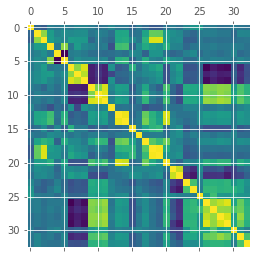

In [184]:
plt.matshow(corr)

Here are all of the positive correlations with a Pearson's correlation coefficient above 0.1

In [172]:
poscorr_rookies = corr[corr>0.1]
poscorr_rookies

,AGE,GP,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM_PG,FGA_PG,FG_PCT,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS,HEIGHT_WO_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
AGE,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165451,0.204028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,NaN,1.000000,0.716188,0.235604,NaN,0.129028,NaN,0.128059,0.137910,NaN,NaN,NaN,NaN,0.295363,0.299535,NaN,NaN,0.284551,0.598623,0.590080,0.243738,0.140759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIN,NaN,0.716188,1.000000,0.247189,0.136144,NaN,0.234312,0.218433,0.205245,NaN,NaN,NaN,NaN,0.313346,0.342169,0.100753,NaN,0.404642,0.906499,0.912406,0.251388,0.100565,0.119893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFF_RATING,NaN,0.235604,0.247189,1.000000,NaN,0.712700,NaN,0.236136,NaN,NaN,NaN,NaN,NaN,0.469602,0.497517,NaN,0.123732,0.328108,0.237525,0.180853,0.366585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEF_RATING,NaN,NaN,0.136144,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.172959,0.173268,NaN,NaN,NaN,NaN,0.102321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NET_RATING,NaN,0.129028,NaN,0.712700,NaN,1.000000,NaN,0.137950,NaN,NaN,NaN,NaN,NaN,0.359072,0.403279,NaN,NaN,0.350655,NaN,NaN,0.301054,0.147018,0.102919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_PCT,NaN,NaN,0.234312,NaN,NaN,NaN,1.000000,0.711465,0.903314,NaN,NaN,NaN,0.159255,NaN,NaN,0.367682,NaN,0.117737,0.233770,0.322478,NaN,0.112776,0.260635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_TO,NaN,0.128059,0.218433,0.236136,NaN,0.137950,0.711465,1.000000,0.814667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109517,0.132681,0.212891,NaN,NaN,0.173124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_RATIO,NaN,0.137910,0.205245,NaN,NaN,NaN,0.903314,0.814667,1.000000,NaN,NaN,NaN,0.159419,NaN,NaN,NaN,NaN,NaN,NaN,0.162947,NaN,NaN,0.213157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OREB_PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.668948,0.898180,NaN,0.251186,0.238337,NaN,NaN,0.303372,NaN,NaN,0.503901,NaN,NaN,0.342423,0.309220,0.270245,0.688869,0.672271,0.710091,0.693031,0.193720,0.517044,0.383467


Here are all of the negative correlations with a Pearson's correlation coefficient below -0.1

In [173]:
negcorr_rookies = corr[corr<-0.1]
negcorr_rookies

,AGE,GP,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM_PG,FGA_PG,FG_PCT,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,THREE_QUARTER_SPRINT,BENCH_PRESS,HEIGHT_WO_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
AGE,NaN,-0.146079,-0.208388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.142855,NaN,-0.114753,-0.224250,-0.222012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,-0.146079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.140074,NaN,NaN,NaN,NaN,NaN,-0.118620,NaN,NaN
MIN,-0.208388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.132697,NaN,NaN,-0.140116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.182269,-0.188542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OFF_RATING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.287118,NaN,NaN,-0.143886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.130832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEF_RATING,NaN,NaN,NaN,NaN,NaN,-0.709556,NaN,NaN,NaN,NaN,NaN,-0.108599,NaN,NaN,NaN,NaN,NaN,-0.170590,NaN,NaN,NaN,-0.144940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.111526,NaN
NET_RATING,NaN,NaN,NaN,NaN,-0.709556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.136314,NaN,NaN,-0.161957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.117322,-0.105727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AST_PCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.557005,-0.457068,-0.550826,NaN,-0.217776,-0.161176,NaN,NaN,NaN,NaN,NaN,-0.271495,NaN,NaN,-0.293776,-0.255961,-0.148479,-0.697265,-0.585486,-0.644791,-0.664468,-0.229883,-0.520995,-0.280972
AST_TO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.559381,-0.433345,-0.538611,-0.348744,-0.133864,-0.121732,NaN,NaN,NaN,NaN,NaN,-0.260208,NaN,NaN,-0.219610,-0.219819,-0.146110,-0.555145,-0.485878,-0.563136,-0.551605,-0.155467,-0.463794,-0.293087
AST_RATIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.578075,-0.473593,-0.568968,NaN,-0.186456,-0.159395,NaN,NaN,NaN,NaN,NaN,-0.279158,NaN,NaN,-0.250284,-0.234103,-0.116605,-0.656392,-0.542978,-0.621400,-0.643571,-0.204271,-0.490959,-0.262749
OREB_PCT,NaN,NaN,-0.132697,NaN,NaN,NaN,-0.557005,-0.559381,-0.578075,NaN,NaN,NaN,NaN,NaN,NaN,-0.205162,NaN,NaN,NaN,-0.187526,NaN,-0.128541,-0.298687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
